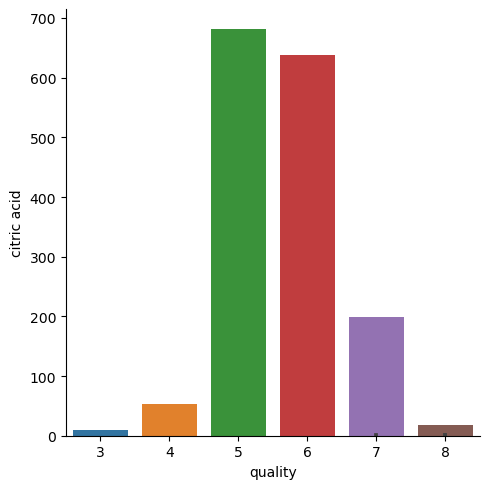

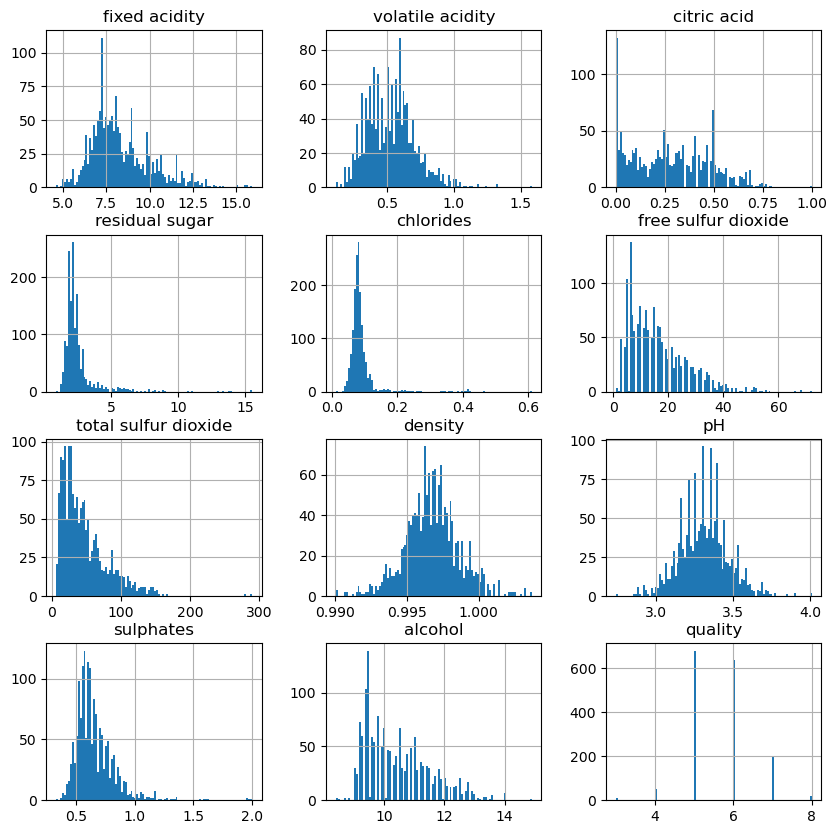

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Train accuracy: 0.9953088350273651
Test accuracy: 0.90625
MSE: 0.09375
R2 score: -0.013620525815647877


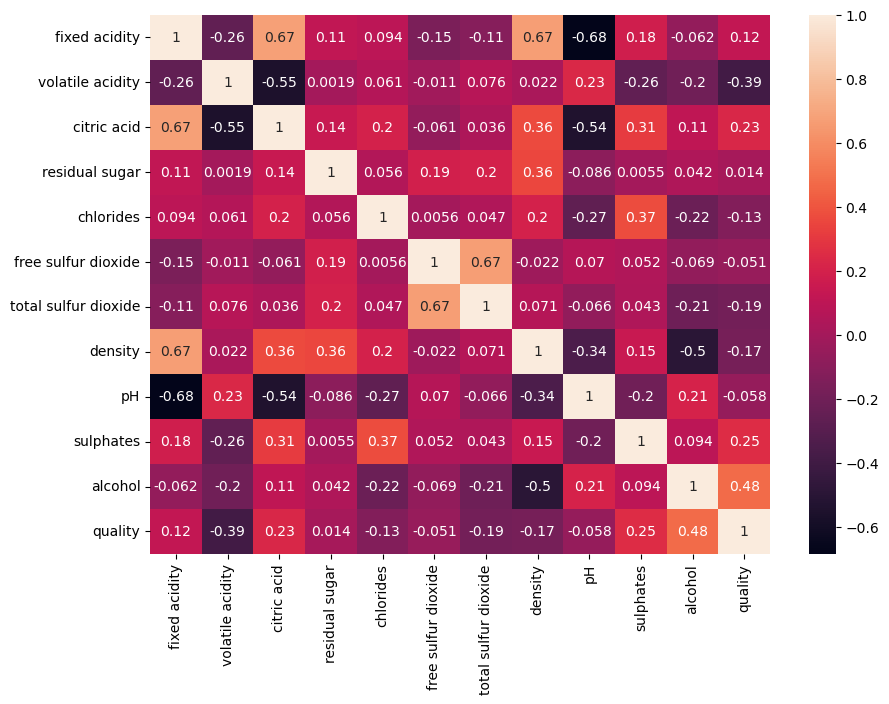

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
# 노트북에서 경로가 안잡혀서 절대경로로 해 놓았습니다. 
data = pd.read_csv("C:\\Users\\hyj73\\OneDrive\\문서\\GitHub\\RedWind_Model\\Model")

# Visualize data
sns.catplot(x='quality', data=data, kind='count')
sns.barplot(x='quality', y='volatile acidity', data=data)
sns.barplot(x='quality', y='citric acid', data=data)
data.hist(bins=100, figsize=(10, 10))
plt.show()
correlation = data.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation, annot=True)
data.corr()['quality'].sort_values()

# Prepare data
X = data.drop('quality', axis=1)
y = data['quality'].apply(lambda y_value: 1 if y_value >= 6.5 else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random forest classifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print('Best parameters:', grid_search.best_params_)
rf = grid_search.best_estimator_

# Evaluate model
train_pred = rf.predict(X_train)
train_acc = accuracy_score(train_pred, y_train)
print('Train accuracy:', train_acc)

test_pred = rf.predict(X_test)
test_acc = accuracy_score(test_pred, y_test)
print('Test accuracy:', test_acc)

mse = mean_squared_error(test_pred, y_test)
print('MSE:', mse)

r2 = r2_score(test_pred, y_test)
print('R2 score:', r2)

In [2]:
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)
#input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf.predict(input_data_reshaped)

print(prediction)

if prediction[0] == 1:
    print("Good Quality Wine!")
else:
    print("Bad Quality Wine")

[1]
Good Quality Wine!


c:\Users\hyj73\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [4]:
import pickle

# 모델 저장
rf.fit(X_train, y_train)
with open('wine.pickle', 'wb') as f:
    pickle.dump(rf, f)
